<a href="https://colab.research.google.com/github/selinyeltekin/MyRepo/blob/master/Lab08_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actual area: 21.000000000000004
 
 
GRAPHS FOR EACH METHOD


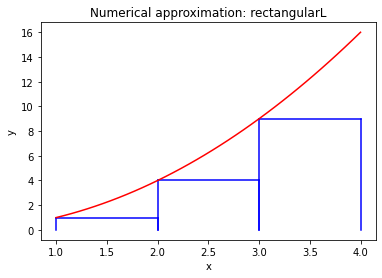

Approximation rectangularL: 14.0  error:  33.33333333333334  %


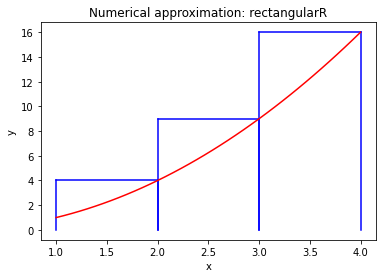

Approximation rectangularR: 29.0  error:  38.095238095238074  %


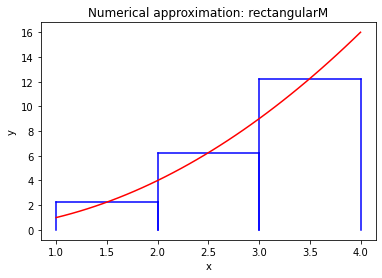

Approximation rectangularM: 20.75  error:  1.1904761904762073  %


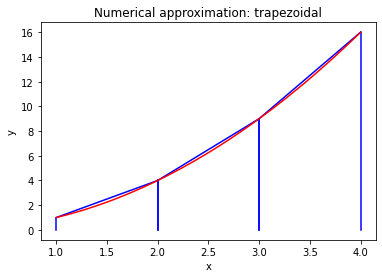

Approximation trapezoidal:  21.5  error:  2.3809523809523636  %


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Initial function given
def f(x):
    y = x**2 
    return y

# Integral of the function  calculated using scipy.integrate
def F(a,b):
    if a > b:
        raise ValueError('b must be greater than a')
    elif a == b:
        return 0
    else:
        y = integrate.quad(lambda x: f(x), a, b)
        return y


def approximateNumerical(a,b,points=10,mod='rectangularM',plt_data=False):
    if points < 2:
        raise ValueError('Number of points must be greater than 2')
    if a == b:
        return 0
    n = np.linspace(a,b,points)
    partialSum = 0
    if mod == 'rectangularM':
        def miniArea(c,d):
            return (d-c)*f((c+d)/2)
    elif mod == 'rectangularL':
        def miniArea(c,d):
            return (d-c)*f(c)
    elif mod == 'rectangularR':
        def miniArea(c,d):
            return (d-c)*f(d)                        
    elif mod == 'trapezoidal':
        def miniArea(c,d):
            return (d-c)*(f(c)+f(d))/2
    else:
        raise ValueError('Method '+mod+' unknown')
    
    for i in range(1,len(n)):
        partialSum += miniArea(n[i-1],n[i])

    if (plot_dat):
       plot_dat(a,b,points,mod)
       
    return partialSum


def plot_dat(a,b,points,mod='rectangularM'):

    n = np.linspace(a,b,points)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Numerical approximation: '+mod)
    if mod == 'rectangularM':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f((c+d)/2)],color='blue')
            plt.plot([d,d],[0,f((c+d)/2)],color='blue')
            plt.plot([c,d],[f((c+d)/2),f((c+d)/2)],color='blue')

    elif mod == 'rectangularL':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([d,d],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(c)],color='blue')

    elif mod == 'rectangularR':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f(d)],color='blue')
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,d],[f(d),f(d)],color='blue')

    elif mod == 'trapezoidal':
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(d)],color='blue')


    n_dense = np.linspace(a,b,10*points)
    plt.plot(n_dense,f(n_dense),color='red')   
    plt.show()

    return 0

m = 1
M = 4
p = 4

actual = F(m,M)[0]
print('Actual area:',actual)
print(' ')
print(' ')
print('GRAPHS FOR EACH METHOD')
recL = approximateNumerical(m,M,p,mod='rectangularL',plt_data=True)
print('Approximation rectangularL:',recL,' error: ',abs((recL-actual)/actual)*100.,' %')
recR = approximateNumerical(m,M,p,mod='rectangularR',plt_data=True)
print('Approximation rectangularR:',recR,' error: ',abs((recR-actual)/actual)*100.,' %')
recM = approximateNumerical(m,M,p,mod='rectangularM',plt_data=True)
print('Approximation rectangularM:',recM,' error: ',abs((recM-actual)/actual)*100.,' %')
trap = approximateNumerical(m,M,p,mod='trapezoidal',plt_data=True)
print('Approximation trapezoidal: ', trap,' error: ',abs((trap-actual)/actual)*100.,' %')
